In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA

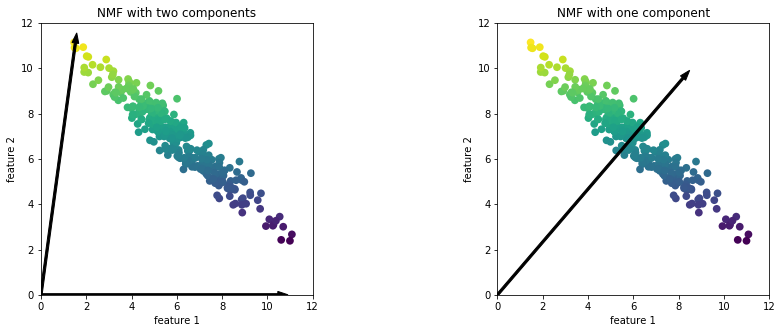

In [3]:
# NMF - unsupervised algorithm to extract useful features, can be used for dimensionality reduction

# Prerequisites: features should be positive

# 1 - all data points can be written as positive combination of two components
# 2 - single component points toward the mean

# Non-neg.components - directions from (0,0) towards data

mglearn.plots.plot_nmf_illustration()

In [4]:
# Load the dataset
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape # shape of each image

# Take only first 50 images per person
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
     mask[np.where(people.target == target)[0][:50]] = 1
        
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [5]:
print('Original shape: ', X_train.shape) # shape[1] - pixel size of image

Original shape:  (1547, 5655)


Shape after transformation:  (1547, 15)


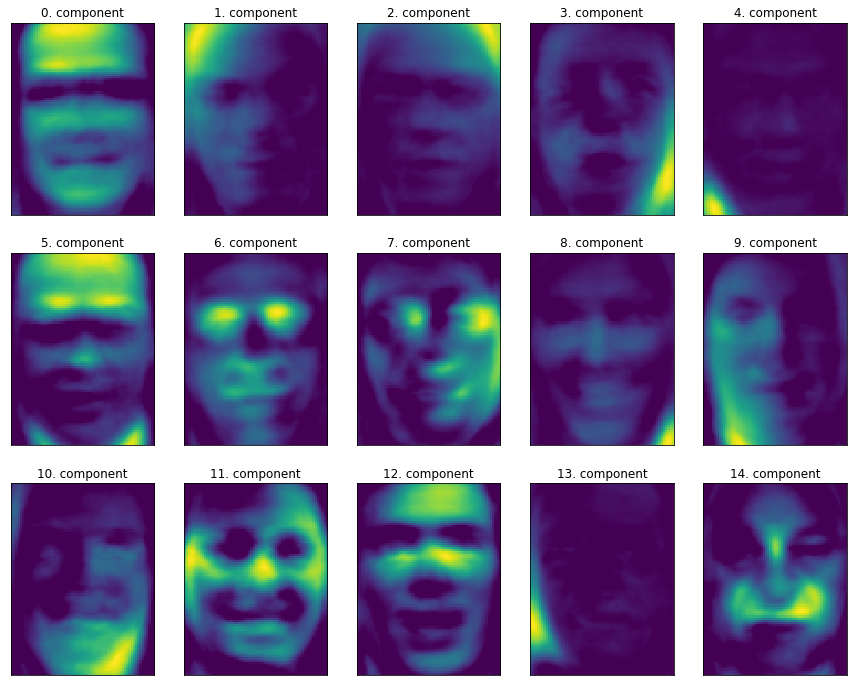

In [6]:
# Visualize 15 non-neg. components found by NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

print('Shape after transformation: ', X_train_nmf.shape) # shape[1] - number of components

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

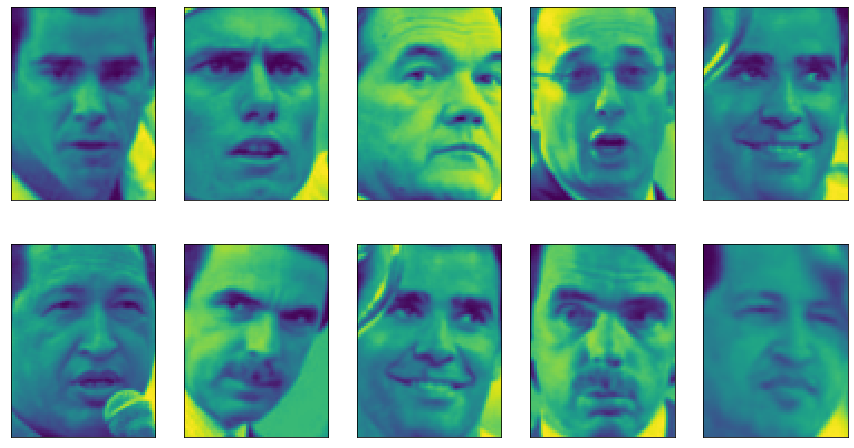

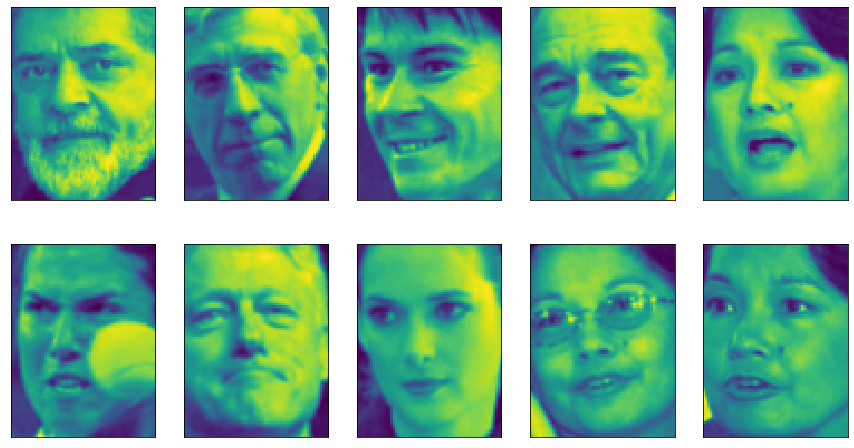

In [7]:
# Display images which have strong component <compn>

compn = 3

inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7

inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

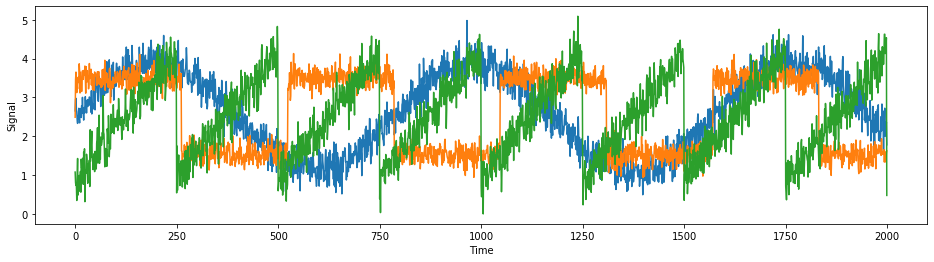

In [8]:
# Use NMF for data that is overlay of several independent sources 

S = mglearn.datasets.make_signals()
plt.figure(figsize=(16, 4))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [9]:
print('Original shape:', S.shape)

Original shape: (2000, 3)


In [10]:
# mix data into a 100-dimensional state

A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [11]:
# Use NMF to recover 3 original signals

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [12]:
# Try PCA for the same purpose

pca = PCA(n_components=3)
H = pca.fit_transform(X)

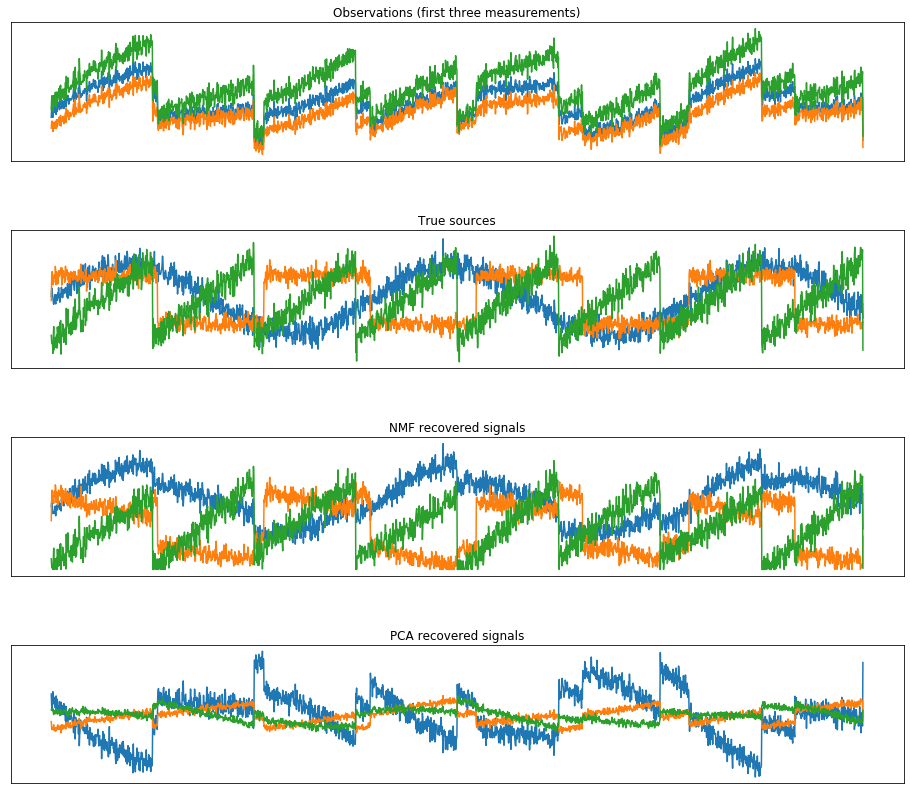

In [14]:
# Visualize results of recovering with NMF and PCA

models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(16, 14), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')